# Importing the libraries


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#  Importing and loading the dataset

In [5]:
dataset = pd.read_csv('train_csv.csv')
testdata = pd.read_csv('test.csv.csv')
dataset.head()   #prints a nutshell of the dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
dataset.info()  #we get detailed info of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Dataset Shape

In [7]:
dataset.shape  #no of rows and columns

(614, 13)

# Dataset Describtion

In [8]:
dataset.describe()  #prints the numerical columns details

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# Checking the missing data

In [9]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

 **Taking care of missing values in "Loan Ammount","credit history"

In [10]:
dataset['LoanAmount'] = dataset['LoanAmount'].fillna(dataset['LoanAmount'].mean())

In [11]:
dataset['Credit_History'] = dataset['Credit_History'].fillna(dataset['Credit_History'].median())

# Let's confirm if there are any missing values in 'LoanAmount' & 'Credit_History

In [12]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

 Now Let's drop all the missing value remaining

In [13]:
dataset.dropna(inplace=True)

## Let's check the Missing values for the final time!

In [14]:
dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

#### This method commonly used to handle the null values. Here, we either delete a particular row if it has a null value for a particular feature and a particular column if it has more than 70-75% of missing values. This method is advised only when there are enough samples in the data set. One has to make sure that after we have deleted the data, there is no addition of bias. Removing the data will lead to loss of information which will not give the expected results while predicting the output

 Lets check our dataset new shape

In [15]:
dataset.shape

(542, 13)

# Deep dive into the dataset

 Comparison between Genders in getting the Loan:

In [16]:
print(pd.crosstab(dataset['Gender'],dataset['Loan_Status']))

Loan_Status    N    Y
Gender               
Female        33   65
Male         133  311


<AxesSubplot:xlabel='Gender', ylabel='count'>

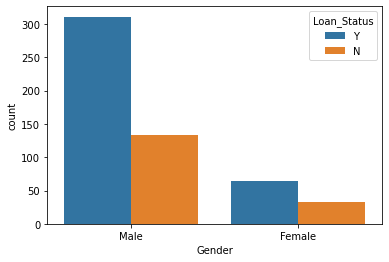

In [17]:
sns.countplot(dataset['Gender'],hue=dataset['Loan_Status'])

 Here, we can see that the Males have more chances to get the Loan.

 Comparison between Married Status in getting the Loan:

Loan_Status   N    Y
Married             
No           70  117
Yes          96  259


<AxesSubplot:xlabel='Married', ylabel='count'>

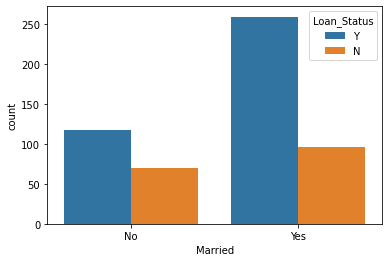

In [18]:
print(pd.crosstab(dataset['Married'],dataset['Loan_Status']))
sns.countplot(dataset['Married'],hue=dataset['Loan_Status'])

 Here we can see married people has a greater chance to get the loan

 Comparison between Self-Employed or Not in getting the Loan:

Loan_Status     N    Y
Property_Area         
Rural          61   98
Semiurban      47  162
Urban          58  116


<AxesSubplot:xlabel='Property_Area', ylabel='count'>

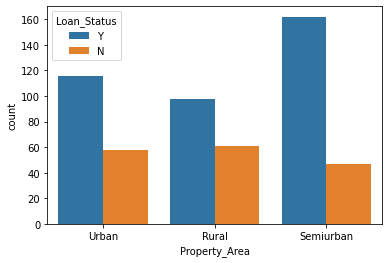

In [19]:
print(pd.crosstab(dataset['Property_Area'],dataset['Loan_Status']))
sns.countplot(dataset['Property_Area'],hue=dataset['Loan_Status'])

The tendency of loan varies semiurban > rural > urban

# Encoding of non-numerical values

In [20]:
dataset['Loan_Status'].replace('Y',1,inplace = True)
dataset['Loan_Status'].replace('N',0,inplace = True)

In [21]:
dataset['Loan_Status'].value_counts()

1    376
0    166
Name: Loan_Status, dtype: int64

In [22]:
dataset.Gender=dataset.Gender.map({'Male':1,'Female':0})
dataset['Gender'].value_counts()

1    444
0     98
Name: Gender, dtype: int64

In [23]:
dataset.Married=dataset.Married.map({'Yes':1,'No':0})
dataset['Married'].value_counts()

1    355
0    187
Name: Married, dtype: int64

In [24]:
dataset.Dependents=dataset.Dependents.map({'0':0,'1':1,'2':2,'3+':3})
dataset['Dependents'].value_counts()

0    309
1     94
2     94
3     45
Name: Dependents, dtype: int64

In [25]:
dataset.Education=dataset.Education.map({'Graduate':1,'Not Graduate':0})
dataset['Education'].value_counts()

1    425
0    117
Name: Education, dtype: int64

In [26]:
dataset.Self_Employed=dataset.Self_Employed.map({'Yes':1,'No':0})
dataset['Self_Employed'].value_counts()

0    467
1     75
Name: Self_Employed, dtype: int64

In [27]:
dataset.Property_Area=dataset.Property_Area.map({'Urban':2,'Rural':0,'Semiurban':1})
dataset['Property_Area'].value_counts()

1    209
2    174
0    159
Name: Property_Area, dtype: int64

In [28]:
dataset['LoanAmount'].value_counts()

146.412162    19
120.000000    15
100.000000    14
110.000000    13
187.000000    12
              ..
280.000000     1
240.000000     1
214.000000     1
59.000000      1
253.000000     1
Name: LoanAmount, Length: 195, dtype: int64

In [29]:
dataset['Loan_Amount_Term'].value_counts()

360.0    464
180.0     38
480.0     13
300.0     12
84.0       4
120.0      3
240.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [30]:
dataset['Credit_History'].value_counts()

1.0    468
0.0     74
Name: Credit_History, dtype: int64

# Display the correlation matrix

Text(0.5, 1.0, 'Correlation Matrix (for Loan Status)')

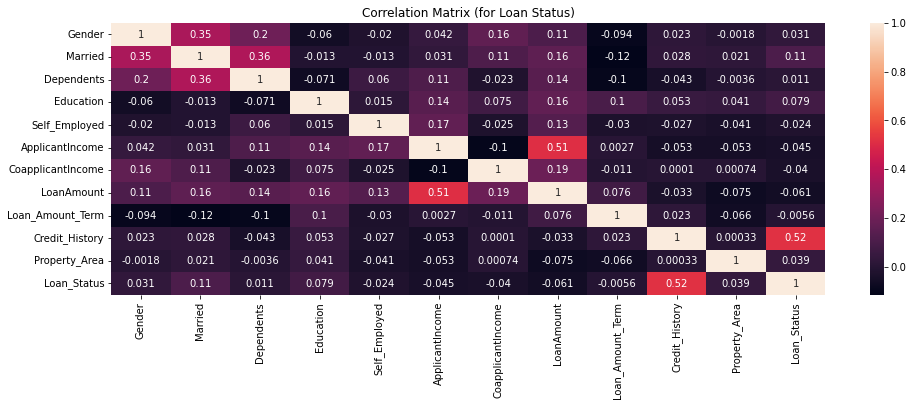

In [31]:
plt.figure(figsize=(16,5))
sns.heatmap(dataset.corr(),annot=True)
plt.title('Correlation Matrix (for Loan Status)')

# Our modified dataset

In [32]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1


# Spliting the dataset into train and test set

In [33]:
X = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1].values

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2, random_state=0)

# Feature scaling

In [35]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [36]:
print(X_train)

[[ 0.4687412   0.72803526  1.20165033 ...  0.27580043  0.41646337
  -1.32153574]
 [ 0.4687412   0.72803526  1.20165033 ...  0.27580043 -2.40117159
   1.21043318]
 [-2.1333734   0.72803526  0.21992468 ...  0.27580043  0.41646337
  -0.05555128]
 ...
 [ 0.4687412   0.72803526  0.21992468 ...  0.27580043  0.41646337
  -0.05555128]
 [ 0.4687412   0.72803526  0.21992468 ... -0.65718072 -2.40117159
  -0.05555128]
 [ 0.4687412   0.72803526 -0.76180097 ...  0.27580043  0.41646337
  -0.05555128]]


# Using Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [38]:
model.fit(X_train, y_train)

LogisticRegression()

In [39]:
LogisticRegression(C=1.0,class_weight=None, dual=False, fit_intercept=True,intercept_scaling=1, max_iter=100, multi_class='0vr', n_jobs=1, penalty='12', random_state=None, solver='liblinear', tol=0.0001,verbose=0, warm_start=False)

LogisticRegression(multi_class='0vr', n_jobs=1, penalty='12',
                   solver='liblinear')

In [40]:
ypred = model.predict(X_test)
print(ypred)

[1 1 1 1 1 1 0 1 0 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [44]:
from sklearn.metrics import f1_score
evaluation_logistic = f1_score(y_test, ypred)
evaluation_logistic

0.8813559322033898

# Using Decision Tree

In [52]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [53]:
ypred_tree = tree.predict(X_test)
print(ypred_tree)

[1 1 1 1 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 1 1 0 0 0 1 1
 1 0 1 0 1 0 0 0 1 0 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 0 0 0 1 0 1 1 1 0 1 1 1
 1 1 0 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1]


In [54]:
evaluation_tree = f1_score(y_test, ypred_tree)
evaluation_tree

0.7333333333333334

# Using Random Forest Classifier

In [55]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

RandomForestClassifier()

In [56]:
ypred_forest = forest.predict(X_test)
print(ypred_forest)

[1 1 1 1 1 1 0 1 0 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1
 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [57]:
evaluation_forest = f1_score(y_test, ypred_forest)
evaluation_forest

0.8690476190476191

# Using Naive Bayesian Classifier

In [59]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [63]:
ypred_bayesian = gnb.predict(X_test)
print(ypred_bayesian)

[1 1 1 1 1 1 0 1 0 0 1 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1
 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [67]:
evaluation_bayesian = f1_score(y_test, ypred_bayesian)
evaluation_bayesian

0.8786127167630058

# Using XGBoost Classifier

In [77]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [79]:
ypred_xgboost = model.predict(X_test)
print(ypred_xgboost)

[1 1 1 1 1 1 0 1 0 1 1 1 0 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1
 1 0 1 0 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 0 1 0 1 1 1 1 1]


In [80]:
evaluation_xgboost = f1_score(y_test, ypred_xgboost)
evaluation_xgboost

0.8148148148148148

# Conclusion

 From the Exploratory Data Analysis, we could generate insight from the data. How each of the features relates to the target. Also, it can be seen from the evaluation of five models that Logistic Regression performed better than others, Naive Bayes did better than Decision Tree

